#### Import the libraries

In [1]:
import numpy as np   # mathematical computation
# numpy is aliased as np
import matplotlib.pyplot as plt  # visualization
# pyplot is aliased as plt
import pandas as pd     # data preprocessing
# pandas is aliased as pd
import seaborn as sns      # visualization
# seaborn is aliased as sns

In [2]:
# !pip install beautifulsoup4

In [3]:
import requests                # used to fetch an end point
from bs4 import BeautifulSoup  # used for Web Scrapaing

In [4]:
url = "https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_3_na_na_na&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=79df5f2c-e1e6-40c9-a470-0a27d885b4c5&as-searchtext=lap"

In [5]:
response = requests.get(url)
print(response)   # it is a valid request

<Response [200]>


In [6]:
data = BeautifulSoup(response.content,'html5lib')
print(data)

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [7]:
# <div class="_4rR01T">HP Athlon Dual Core 3050U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq1559AU Thin and Light Laptop</div>
a = data.find('div',attrs={'class':'_4rR01T'})
print(a)
print(a.text)  # laptop desc

<div class="_4rR01T">ASUS Celeron Dual Core - (4 GB/1 TB HDD/Windows 10 Home) X543MA-GQ1015T Laptop</div>
ASUS Celeron Dual Core - (4 GB/1 TB HDD/Windows 10 Home) X543MA-GQ1015T Laptop


In [8]:
# <div class="gUuXy-"><span id="productRating_LSTCOMGG63HRV3GFN4GQBG9TC_COMGG63HRV3GFN4G_" class="_1lRcqv"><div class="_3LWZlK">4<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"></div></span><span class="_2_R_DZ"><span><span>869 Ratings&nbsp;</span><span class="_13vcmD">&amp;</span><span>&nbsp;94 b</span></span></span></div>
b = data.find('div',attrs={'class':'gUuXy-'})
print(b)
print(b.text)
print(b.text[:3])             # ratings
print(b.text.split()[0][3:])  # num of ratings
print(b.text.split()[3])      # num of reviews

<div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTCOMFSKF9UQH8RKYFZNEOSL_COMFSKF9UQH8RKYF_"><div class="_3LWZlK">3.7</div></span><span class="_2_R_DZ"><span><span>17,754 Ratings </span><span class="_13vcmD">&amp;</span><span> 2,301 Reviews</span></span></span></div>
3.717,754 Ratings & 2,301 Reviews
3.7
17,754
2,301


In [9]:
c = data.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
print(c)
print(c.text)   # price
# <div class="_30jeq3 _1_WHN1">₹33,990</div>

<div class="_30jeq3 _1_WHN1">₹22,990</div>
₹22,990


In [10]:
d = data.find('div',attrs={'class':'_3tbKJL'})
print(d)
print(d.text)          
print(d.text.split('₹'))
print(d.text.split('₹')[1])                  # discounted price
print(d.text.split('₹')[2][:6])              # acutal price
print(d.text.split('₹')[2].split()[0][-3:])  # percent discount
# <div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹29,490</div><div class="_3I9_wc _27UcVY">₹39,288</div><div class="_3Ay6Sb"><span>24% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color: rgb(0, 0, 0); font-size: 12px; font-weight: 400;">Free delivery</div></div></div></div>

<div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹22,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->30,990</div><div class="_3Ay6Sb"><span>25% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-size:12px;font-weight:400">Free delivery</div></div></div></div>
₹22,990₹30,99025% offFree delivery
['', '22,990', '30,99025% offFree delivery']
22,990
30,990
25%


In [11]:
ldesc = []
for i in data.findAll('div',attrs={'class':'_4rR01T'}):
    ldesc.append(i.text)
print(len(ldesc))

24


In [12]:
print(ldesc)

['ASUS Celeron Dual Core - (4 GB/1 TB HDD/Windows 10 Home) X543MA-GQ1015T Laptop', 'ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L...', 'HP Athlon Dual Core 3050U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq1559AU Thin and Light Laptop', 'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...', 'HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 GB/512 GB SSD/Windows 10/4 GB Graphics/NVIDIA GeForce ...', 'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop', 'Lenovo Intel Celeron Dual Core - (8 GB/256 GB SSD/Windows 11 Home) 81WQ00MQIN|81WQ00NXIN Laptop', 'Nokia PureBook S14 Core i5 11th Gen - (16 GB/512 GB SSD/Windows 11 Home) NKi511TL165S Thin and Light L...', 'Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop', 'acer Aspire 3 Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/Windows 11 Home) A315-23 Lapt

In [13]:
brand = []
for i in data.findAll('div',attrs={'class':'_4rR01T'}):
    brand.append(i.text.split()[0])
print(len(brand))
print(brand)

24
['ASUS', 'ASUS', 'HP', 'ASUS', 'HP', 'HP', 'Lenovo', 'Nokia', 'Lenovo', 'acer', 'ASUS', 'Infinix', 'DELL', 'HP', 'HP', 'Nokia', 'HP', 'MSI', 'DELL', 'DELL', 'RedmiBook', 'Lenovo', 'HP', 'acer']


In [14]:
ratings = []
for i in data.findAll('div',attrs={'class':'gUuXy-'}):
    if '.' in i.text:
        ratings.append(i.text[:3])
    else:
        ratings.append(i.text[:1])

In [15]:
print(len(ratings))
print(ratings)

24
['3.7', '4.1', '4', '4.3', '4.4', '4.2', '4.1', '4', '4', '4.2', '4.4', '4.1', '4.1', '4.2', '4.3', '3.9', '4.1', '4.4', '4.7', '3.9', '4.1', '3.8', '4.2', '4.3']


In [16]:
num_ratings = []
num_reviews = []
for i in data.findAll('div',attrs={'class':'gUuXy-'}):
    if '.' in i.text:
        num_ratings.append(i.text.split()[0][3:])
    else:
        num_ratings.append(i.text.split()[0][1:])
    num_reviews.append(i.text.split()[3])

In [17]:
print(len(num_ratings))
print(num_ratings)
print(len(num_reviews))
print(num_reviews)

24
['17,754', '707', '869', '9,997', '11,907', '1,585', '373', '817', '28', '273', '1,371', '1,686', '39', '328', '279', '460', '1,070', '2,126', '15', '22', '3,663', '13', '1,926', '2,977']
24
['2,301', '87', '94', '1,002', '1,202', '139', '35', '193', '2', '55', '166', '261', '1', '36', '32', '88', '107', '286', '1', '2', '431', '2', '160', '347']


In [18]:
dis_price = []
act_price = []
for i in data.findAll('div',attrs={'class':'_3tbKJL'}):
#     print(i.text.split('₹'))
    if len(i.text.split('₹'))>2:
        dis_price.append(i.text.split('₹')[1])
        act_price.append(i.text.split('₹')[2][:6])
    else:
        dis_price.append(i.text.split('₹')[1])
        act_price.append(i.text.split('₹')[1])

In [19]:
print(len(act_price))
print(len(dis_price))
print(act_price)
print(dis_price)

24
24
['30,990', '33,990', '39,288', '45,990', '63,539', '47,206', '40,490', '82,990', '59,760', '42,999', '71,990', '59,999', '58,489', '50,585', '59,108', '74,990', '43,631', '72,990', '54,392Free delivery', '93,134', '59,999', '29,999', '70,235', '83,999']
['22,990', '23,990', '29,490', '33,990', '52,990', '35,490', '25,917', '40,990', '33,999', '26,990', '52,990', '47,999', '37,990', '40,950', '49,123', '43,990', '29,990', '49,990', '54,392Free delivery', '71,900', '39,990', '18,990', '56,999', '57,990']


In [20]:
per_dis = []
for i in data.findAll('div',attrs={'class':'_3tbKJL'}):
    if len(i.text.split('₹'))>2:
        per_dis.append(i.text.split('₹')[2].split()[0][-3:])
    else:
        per_dis.append('0%')

print(len(per_dis))
print(per_dis)
#     print(i.text.split('₹')[2].split()[0][-3:])

24
['25%', '29%', '24%', '26%', '16%', '24%', '35%', '50%', '43%', '37%', '26%', '20%', '35%', '19%', '16%', '41%', '31%', '31%', '0%', '22%', '33%', '36%', '18%', '30%']


In [21]:
e = data.find('div',attrs={'class':'fMghEO'})
print(e)
print(e.text)
print(e.ul.li.text)                # processor
print(e.ul.li.next_sibling.text)   # ram

# <div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (10th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">Office Home and Student 2021</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div>

<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Celeron Dual Core Processor</li><li class="rgWa7D">4 GB DDR4 RAM</li><li class="rgWa7D">64 bit Windows 10 Operating System</li><li class="rgWa7D">1 TB HDD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">Splendid</li><li class="rgWa7D">1 Year Onsite Warranty</li></ul></div>
Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD39.62 cm (15.6 inch) DisplaySplendid1 Year Onsite Warranty
Intel Celeron Dual Core Processor
4 GB DDR4 RAM


In [22]:
processor = []
ram = []
for i in data.findAll('div',attrs={'class':'fMghEO'}):
    processor.append(i.ul.li.text)
    ram.append(e.ul.li.next_sibling.text)

print(len(processor),len(ram))

24 24


### Creating DataFrame

In [23]:
# laptops = pd.DataFrame({'Brand':brand})
# #                        'Processor':processor,'Ram':ram,'Discounted_Price':dis_price,
# #                        'Actual_Price':act_price,'Per_Discount':per_dis,'Desc':ldesc,
# #                        'Ratings':ratings,'Num_of_ratings':num_ratings,'Num_Reviews':num_reviews})
# laptops.head()

In [24]:
laptops = pd.DataFrame({'Brand':brand,'Processor':processor,'Ram':ram,'Discounted_Price':dis_price,
                       'Actual_Price':act_price,'Per_Discount':per_dis,'Desc':ldesc,
                       'Ratings':ratings,'Num_of_ratings':num_ratings,'Num_Reviews':num_reviews})
laptops.head()

,Brand,Processor,Ram,Discounted_Price,Actual_Price,Per_Discount,Desc,Ratings,Num_of_ratings,Num_Reviews
0,ASUS,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,"22,990","30,990",25%,ASUS Celeron Dual Core - (4 GB/1 TB HDD/Window...,3.7,"17,754","2,301"
1,ASUS,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,"23,990","33,990",29%,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,4.1,707,87
2,HP,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,"29,490","39,288",24%,HP Athlon Dual Core 3050U - (8 GB/512 GB SSD/W...,4,869,94
3,ASUS,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,"33,990","45,990",26%,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"9,997","1,002"
4,HP,AMD Ryzen 5 Hexa Core Processor,4 GB DDR4 RAM,"52,990","63,539",16%,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"11,907","1,202"


In [25]:
df = laptops.copy()

In [26]:
laptops.shape

(24, 10)

In [27]:
laptops.dtypes

Brand               object
Processor           object
Ram                 object
Discounted_Price    object
Actual_Price        object
Per_Discount        object
Desc                object
Ratings             object
Num_of_ratings      object
Num_Reviews         object
dtype: object

In [28]:
laptops['Ratings'] = laptops['Ratings'].astype('float')
laptops.dtypes

Brand                object
Processor            object
Ram                  object
Discounted_Price     object
Actual_Price         object
Per_Discount         object
Desc                 object
Ratings             float64
Num_of_ratings       object
Num_Reviews          object
dtype: object

In [29]:
laptops['Discounted_Price'].values

array(['22,990', '23,990', '29,490', '33,990', '52,990', '35,490',
       '25,917', '40,990', '33,999', '26,990', '52,990', '47,999',
       '37,990', '40,950', '49,123', '43,990', '29,990', '49,990',
       '54,392Free delivery', '71,900', '39,990', '18,990', '56,999',
       '57,990'], dtype=object)

In [30]:
dp = [i.replace(',','') for i in laptops['Discounted_Price'].values]
dp = [int(i.replace('Free delivery','')) for i in dp]
dp

[22990,
 23990,
 29490,
 33990,
 52990,
 35490,
 25917,
 40990,
 33999,
 26990,
 52990,
 47999,
 37990,
 40950,
 49123,
 43990,
 29990,
 49990,
 54392,
 71900,
 39990,
 18990,
 56999,
 57990]

In [31]:
laptops['Discounted_Price'] = dp
laptops.dtypes

Brand                object
Processor            object
Ram                  object
Discounted_Price      int64
Actual_Price         object
Per_Discount         object
Desc                 object
Ratings             float64
Num_of_ratings       object
Num_Reviews          object
dtype: object

In [32]:
laptops['Actual_Price'].values

array(['30,990', '33,990', '39,288', '45,990', '63,539', '47,206',
       '40,490', '82,990', '59,760', '42,999', '71,990', '59,999',
       '58,489', '50,585', '59,108', '74,990', '43,631', '72,990',
       '54,392Free delivery', '93,134', '59,999', '29,999', '70,235',
       '83,999'], dtype=object)

In [33]:
ap = [i.replace(',','') for i in laptops['Actual_Price'].values]
ap = [int(i.replace('Free delivery','')) for i in ap]
ap

[30990,
 33990,
 39288,
 45990,
 63539,
 47206,
 40490,
 82990,
 59760,
 42999,
 71990,
 59999,
 58489,
 50585,
 59108,
 74990,
 43631,
 72990,
 54392,
 93134,
 59999,
 29999,
 70235,
 83999]

In [34]:
laptops['Actual_Price'] = ap
laptops.dtypes

Brand                object
Processor            object
Ram                  object
Discounted_Price      int64
Actual_Price          int64
Per_Discount         object
Desc                 object
Ratings             float64
Num_of_ratings       object
Num_Reviews          object
dtype: object

In [35]:
# laptops.head()

In [36]:
laptops['Per_Discount'].values

array(['25%', '29%', '24%', '26%', '16%', '24%', '35%', '50%', '43%',
       '37%', '26%', '20%', '35%', '19%', '16%', '41%', '31%', '31%',
       '0%', '22%', '33%', '36%', '18%', '30%'], dtype=object)

In [37]:
pd = [int(i.replace('%','')) for i in laptops['Per_Discount'].values]
print(pd)

[25, 29, 24, 26, 16, 24, 35, 50, 43, 37, 26, 20, 35, 19, 16, 41, 31, 31, 0, 22, 33, 36, 18, 30]


In [38]:
laptops['Per_Discount'] = pd
laptops.dtypes

Brand                object
Processor            object
Ram                  object
Discounted_Price      int64
Actual_Price          int64
Per_Discount          int64
Desc                 object
Ratings             float64
Num_of_ratings       object
Num_Reviews          object
dtype: object

In [39]:
laptops['Num_of_ratings'].values

array(['17,754', '707', '869', '9,997', '11,907', '1,585', '373', '817',
       '28', '273', '1,371', '1,686', '39', '328', '279', '460', '1,070',
       '2,126', '15', '22', '3,663', '13', '1,926', '2,977'], dtype=object)

In [40]:
num_rat = [int(i.replace(',','')) for i in laptops['Num_of_ratings'].values]
laptops['Num_of_ratings'] = num_rat
laptops.dtypes
# print(num_rev)

Brand                object
Processor            object
Ram                  object
Discounted_Price      int64
Actual_Price          int64
Per_Discount          int64
Desc                 object
Ratings             float64
Num_of_ratings        int64
Num_Reviews          object
dtype: object

In [41]:
num_rev = [int(i.replace(',','')) for i in laptops['Num_Reviews'].values]
print(num_rev)


[2301, 87, 94, 1002, 1202, 139, 35, 193, 2, 55, 166, 261, 1, 36, 32, 88, 107, 286, 1, 2, 431, 2, 160, 347]


In [42]:
laptops['Num_Reviews'] = num_rev
laptops.dtypes

Brand                object
Processor            object
Ram                  object
Discounted_Price      int64
Actual_Price          int64
Per_Discount          int64
Desc                 object
Ratings             float64
Num_of_ratings        int64
Num_Reviews           int64
dtype: object

In [43]:
laptops.head()

,Brand,Processor,Ram,Discounted_Price,Actual_Price,Per_Discount,Desc,Ratings,Num_of_ratings,Num_Reviews
0,ASUS,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,22990,30990,25,ASUS Celeron Dual Core - (4 GB/1 TB HDD/Window...,3.7,17754,2301
1,ASUS,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,23990,33990,29,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,4.1,707,87
2,HP,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,29490,39288,24,HP Athlon Dual Core 3050U - (8 GB/512 GB SSD/W...,4.0,869,94
3,ASUS,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,33990,45990,26,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,9997,1002
4,HP,AMD Ryzen 5 Hexa Core Processor,4 GB DDR4 RAM,52990,63539,16,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,11907,1202


### Brand wise Avg Discounted price

In [44]:
r1 = laptops.groupby('Brand')['Discounted_Price'].mean()
r1

Brand
ASUS         33490.000000
DELL         54760.666667
HP           42147.428571
Infinix      47999.000000
Lenovo       26302.000000
MSI          49990.000000
Nokia        42490.000000
RedmiBook    39990.000000
acer         42490.000000
Name: Discounted_Price, dtype: float64

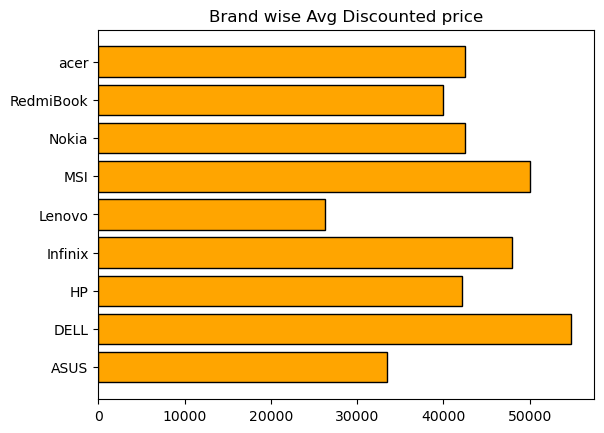

In [47]:
plt.barh(r1.index,r1.values,color='orange',edgecolor='black')
plt.title('Brand wise Avg Discounted price')
plt.show()